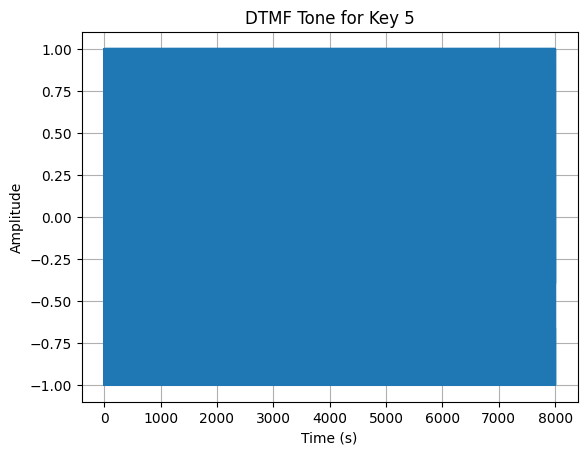

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def gentone(key, duration=1, sampling_rate=8000):
    # Define the base frequencies for rows and columns
    row_freqs = [697, 770, 852, 941]
    col_freqs = [1209, 1336, 1477]

    # Validate the key input
    if key < 0 or key > 9:
        raise ValueError("Invalid key. Must be between 0 and 9.")

    # Calculate the frequencies for the chosen key
    row_idx = key // 3
    col_idx = key % 3
    freq_row = row_freqs[row_idx]
    freq_col = col_freqs[col_idx]

    # Generate the time vector
    t = np.linspace(0, duration, int(sampling_rate * duration), endpoint=False)

    # Generate the tone signal by superposing the two sine waves
    signal = np.sin(2 * np.pi * freq_row * t) + np.sin(2 * np.pi * freq_col * t)

    # Normalize the signal
    signal /= np.max(np.abs(signal))

    return t, signal

# Example usage:
sampling_rate = 8000
t, signal = gentone(0, sampling_rate)
plt.plot(t, signal)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('DTMF Tone for Key 5')
plt.grid(True)
plt.show()

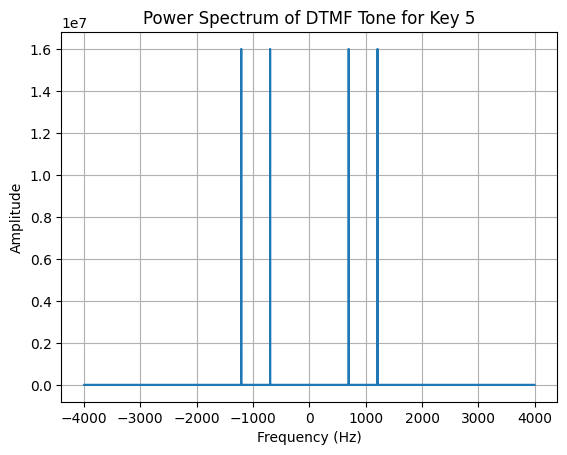

In [6]:
# Apply FFT to the signal
fft_result = np.fft.fft(signal)
freqs = np.fft.fftfreq(len(fft_result), 1.0 / sampling_rate)

# Plot the power spectrum
plt.figure()
plt.plot(freqs, np.abs(fft_result))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('Power Spectrum of DTMF Tone for Key 5')
plt.grid(True)
plt.show()


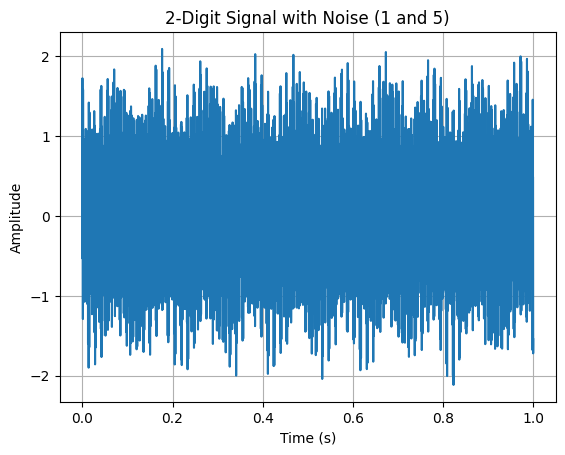

In [7]:
def generate_2_digit_signal(digit1, digit2, duration=1, sampling_rate=8000, noise_amplitude=0.1):
    t1, signal1 = gentone(digit1, duration, sampling_rate)
    t2, signal2 = gentone(digit2, duration, sampling_rate)
    
    # Combine the two signals with a small amount of random noise
    noise = noise_amplitude * np.random.randn(len(t1))
    combined_signal = signal1 + signal2 + noise
    
    return t1, combined_signal

# Example usage:
t_2digits, signal_2digits = generate_2_digit_signal(1, 5)
plt.plot(t_2digits, signal_2digits)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('2-Digit Signal with Noise (1 and 5)')
plt.grid(True)
plt.show()


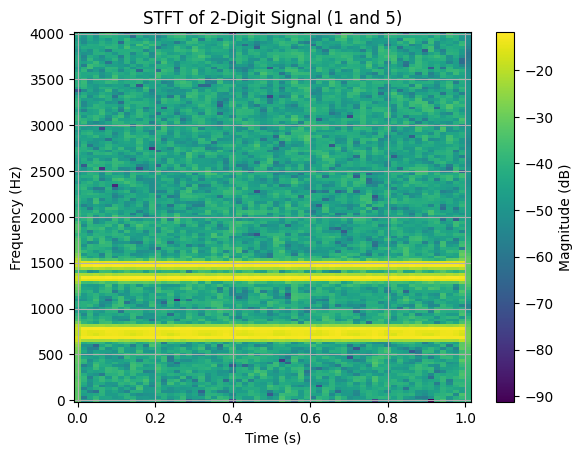

In [8]:
from scipy.signal import stft

# Apply STFT to the signal
frequencies, times, Zxx = stft(signal_2digits, fs=sampling_rate)

# Plot the time versus frequency representation
plt.pcolormesh(times, frequencies, 20 * np.log10(np.abs(Zxx)), shading='auto')
plt.colorbar(label='Magnitude (dB)')
plt.title('STFT of 2-Digit Signal (1 and 5)')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.grid(True)
plt.show()


Identified phone number: 9


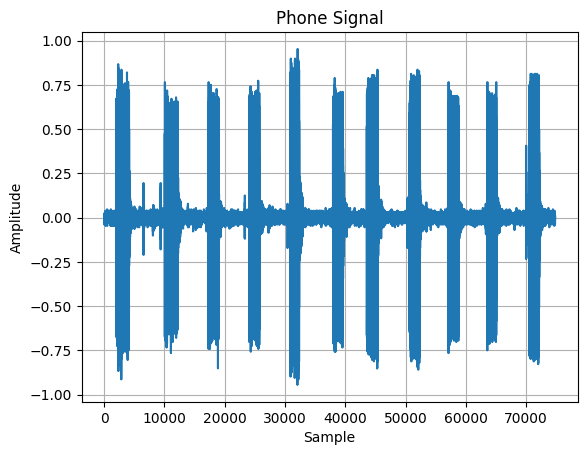

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Load the signal from phone.dat (replace 'phone.dat' with the actual file path)
signal = np.loadtxt('phone.dat')

# Define the known DTMF frequencies
row_freqs = [697, 770, 852, 941]
col_freqs = [1209, 1336, 1477]

# Find the dominant frequencies in the signal
def find_dominant_frequency(signal, sampling_rate):
    fft_result = np.fft.fft(signal)
    freqs = np.fft.fftfreq(len(fft_result), 1.0 / sampling_rate)
    magnitude = np.abs(fft_result)
    dominant_freq = freqs[np.argmax(magnitude)]
    return dominant_freq

# Find the row and column frequencies
row_freq = find_dominant_frequency(signal, sampling_rate)
col_freq = find_dominant_frequency(signal[int(sampling_rate/2):], sampling_rate)

# Find the closest known frequencies
row_key = min(range(len(row_freqs)), key=lambda i: abs(row_freqs[i] - row_freq))
col_key = min(range(len(col_freqs)), key=lambda i: abs(col_freqs[i] - col_freq))

# Determine the pressed key
pressed_key = row_key * 3 + col_key

# Print the identified phone number
print("Identified phone number:", pressed_key)

# Plot the signal
plt.plot(signal)
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.title('Phone Signal')
plt.grid(True)
plt.show()
